In [1]:
%run setup_levy_model_hick.py

2024-06-13 08:31:11.016854: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-13 08:31:11.049936: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-13 08:31:11.220584: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-13 08:31:11.220612: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-13 08:31:11.246443: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

2.15.1


INFO:root:Loaded loss history from checkpoints//hick/history_24.pkl.
INFO:root:Networks loaded from checkpoints//hick/ckpt-24
INFO:root:Performing a consistency check with provided components...


[[1.1 3.  0.3 0.2 1.5]] [[0.6 3.  0.2 0.2 0.3]]


INFO:root:Done.


In [2]:
f = open("training_data_hick.obj","rb")
train_data  = pickle.load(f)
f.close()

In [3]:
history = trainer.train_offline(
    simulations_dict = train_data, 
    epochs = 100, 
    batch_size = 16
)

Training epoch 1:   0%|          | 0/6250 [00:00<?, ?it/s]

2024-06-13 08:31:35.693918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type CPU is enabled.


KeyboardInterrupt: 

In [5]:
history = trainer.load_pretrained_network()

In [7]:
# Generate some validation data
validation_sims = configurator(model(batch_size=2000))

# Extract unstandardized prior draws and transform to original scale
prior_samples = validation_sims["parameters"]

print(
    f"Estimation will be performed on data sets with {validation_sims['summary_conditions'].shape[1]} simulated trials."
)

Estimation will be performed on data sets with 99 simulated trials.


In [8]:
# Generate 100 posterior draws for each of the 1000 simulated data sets
post_samples = amortizer.sample(validation_sims, n_samples=100)

# Unstandardize posterior draws into original scale
post_samples = post_samples 

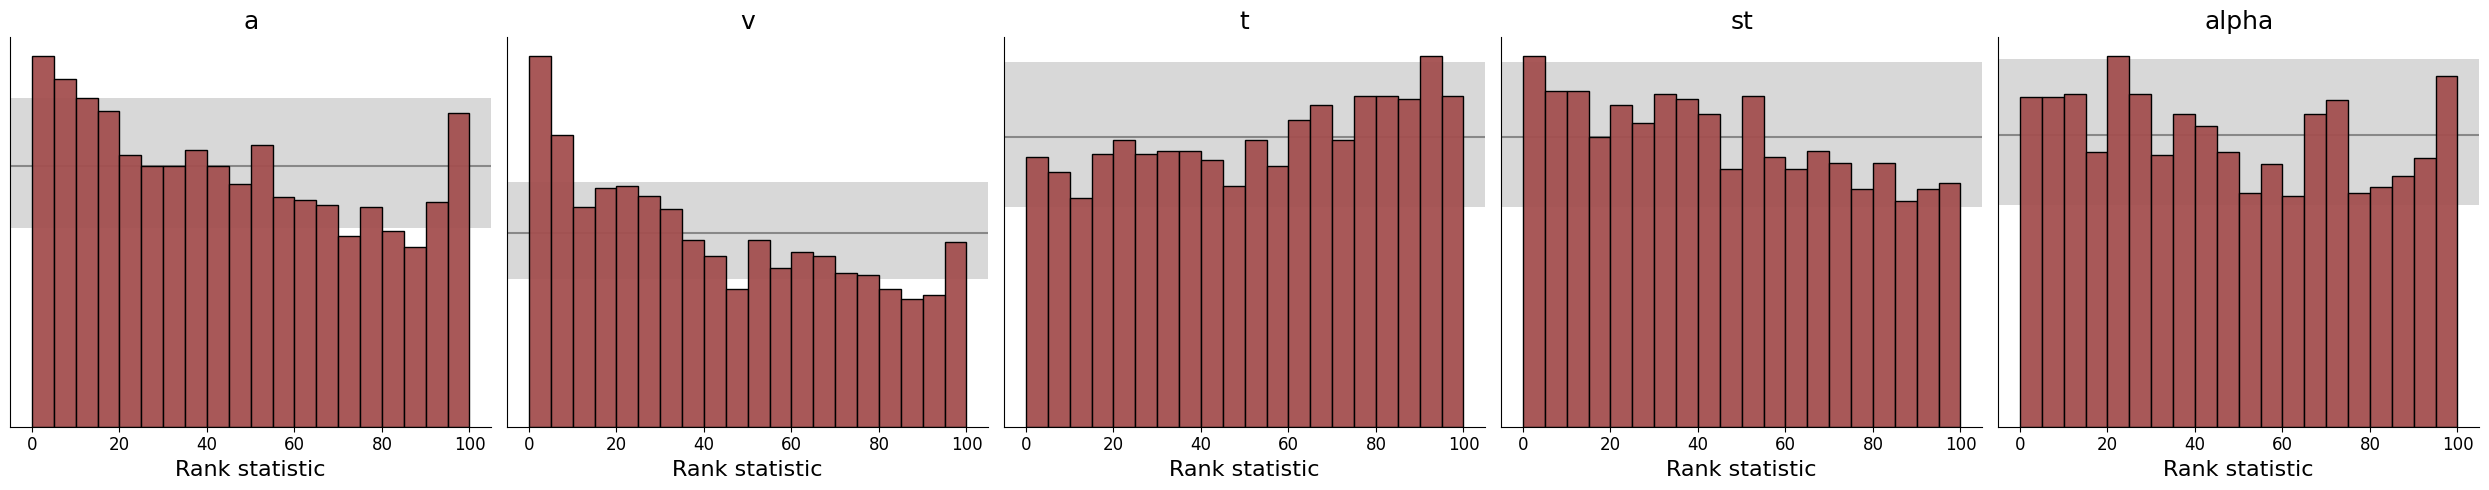

In [11]:
f = bf.diagnostics.plot_sbc_histograms(post_samples, prior_samples, num_bins=20, param_names=PARAM_NAMES)

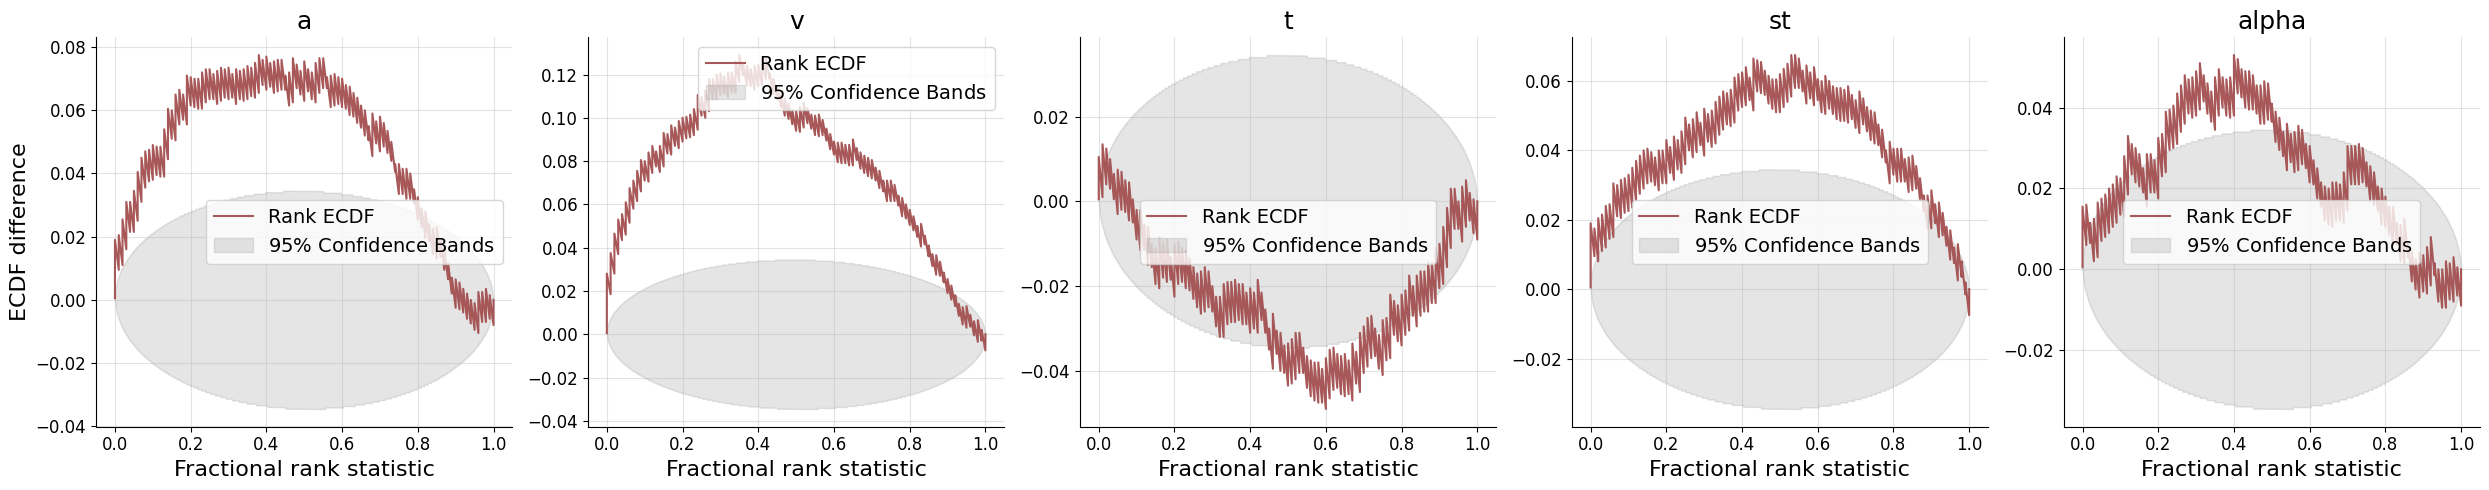

In [10]:
f = bf.diagnostics.plot_sbc_ecdf(post_samples, prior_samples, stacked=False, difference=True, param_names=PARAM_NAMES)

In [12]:
post_samples = amortizer.sample(validation_sims, n_samples=1000)


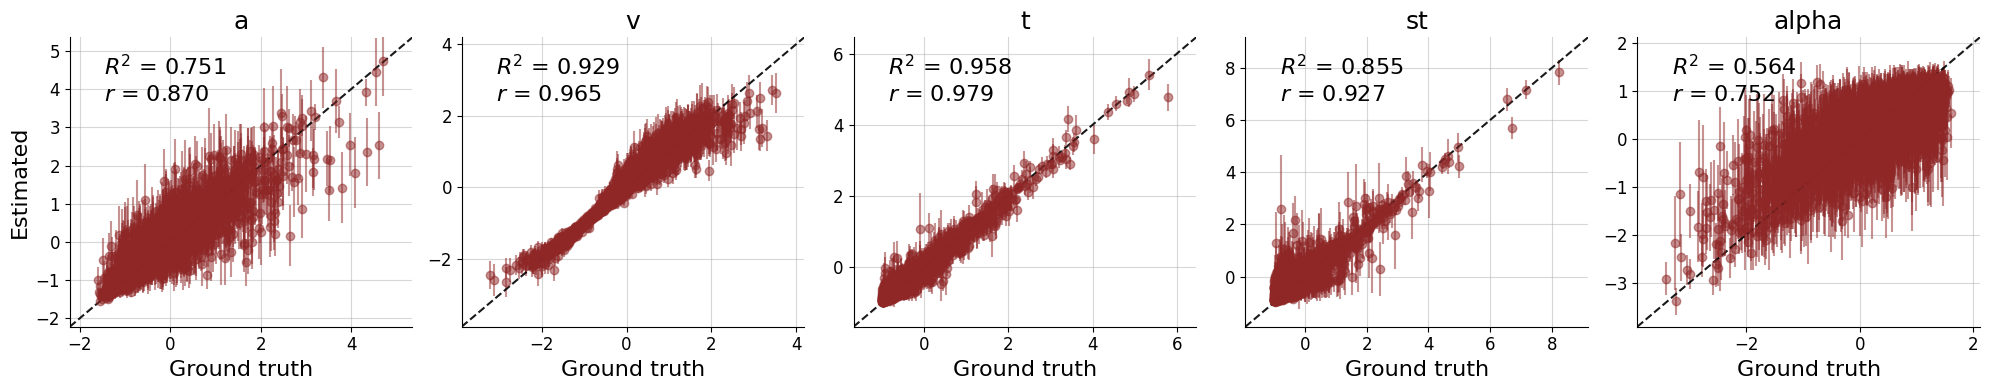

In [13]:
f = bf.diagnostics.plot_recovery(
    post_samples, prior_samples, param_names=prior.param_names, point_agg=np.mean, uncertainty_agg=np.std
)

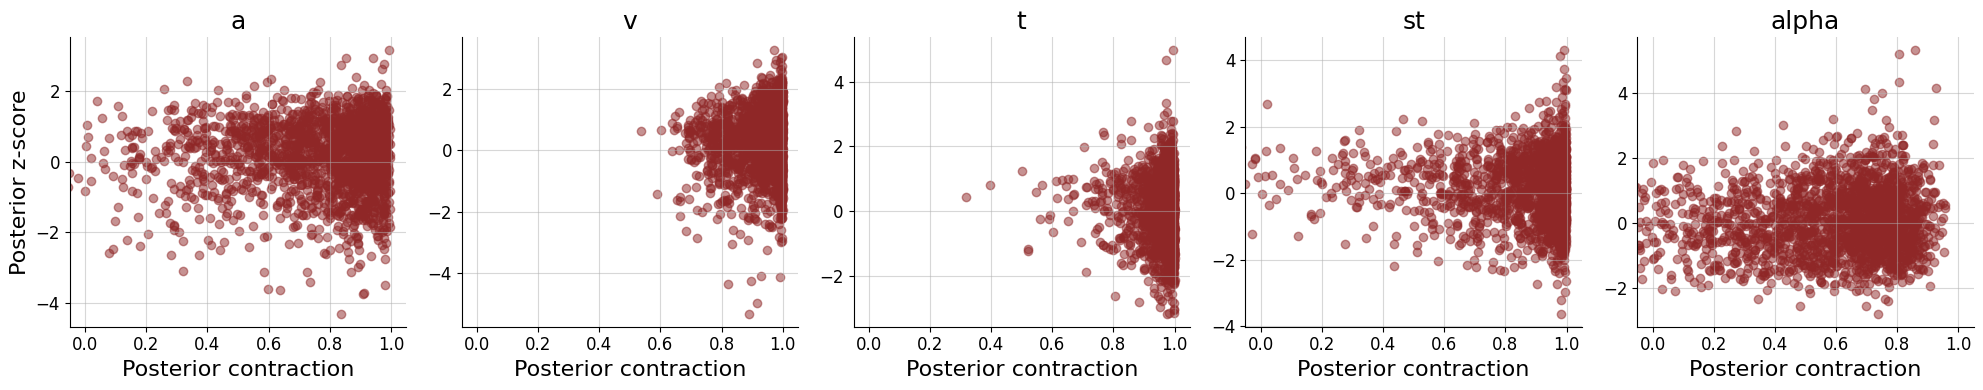

In [14]:
f = bf.diagnostics.plot_z_score_contraction(post_samples, prior_samples, param_names=prior.param_names)